<a href="https://colab.research.google.com/github/abigailvania99/machineLearning/blob/main/Copy_of_corr_ANN_SVM_4_CLASSIFICATION_Abigail_Vania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION USING ANN AND SVM

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/abigailvania99/churn_dataset/main/Churn_Dataset.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# DATA PREPROCESSING

In [ ]:
# Removing the unnecassary features from the dataset

dfcopy = data.drop(["RowNumber", "CustomerId","Surname"], axis=1)
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = dfcopy
y = dfcopy["Exited"]

In [ ]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

# Lakukan one-hot encoding pada kolom tertentu
x = pd.get_dummies(x, columns=["Geography", "Gender"])


x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
x.corr()['Exited'].abs().sort_values()

HasCrCard            0.007138
EstimatedSalary      0.012097
Tenure               0.014001
CreditScore          0.027094
NumOfProducts        0.047820
Geography_Spain      0.052667
Geography_France     0.104955
Gender_Male          0.106512
Gender_Female        0.106512
Balance              0.118533
IsActiveMember       0.156128
Geography_Germany    0.173488
Age                  0.285323
Exited               1.000000
Name: Exited, dtype: float64

In [ ]:
x = x.drop(["Exited"], axis=1)
x = x.drop(["HasCrCard","EstimatedSalary"], axis=1)

In [ ]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Feature Scaling
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8061428571428572
Testing Accuracy : 0.8223333333333334
[[2319   85]
 [ 448  148]]


# SUPPORT  VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
# from early_stopping import EarlyStopping
from keras.callbacks import EarlyStopping
from sklearn.ensemble import VotingClassifier


# parameters = {'kernel': ['linear', 'rbf', 'poly'],
#               'C': [1, 10, 100, 1000],
#               'gamma': [0.001, 0.01, 0.1, 1]}

parameters = {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(SVC(), parameters, cv=5)
clf.fit(x_train, y_train)

# Print best parameters
print(clf.best_params_)

# Train model with best parameters
clf = SVC(kernel=clf.best_params_['kernel'], C=clf.best_params_['C'], gamma=clf.best_params_['gamma'])
# clf = SVC(kernel='rbf', C=1, gamma=1)
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)
clf.fit(x_train, y_train)

# from sklearn.svm import LinearSVC

# clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
# clf.fit(x_train, y_train)

# Evaluate model on training data
training_accuracy = clf.score(x_train, y_train)
print("Training accuracy:", training_accuracy)

# Evaluate model on testing data
testing_accuracy = clf.score(x_test, y_test)
print("Testing accuracy:", testing_accuracy)

cm = confusion_matrix(y_test, y_pred)
print(cm)

'''
# kernel='rbf', C=1, gamma=1

# Training accuracy: 0.9082857142857143
# Testing accuracy: 0.831
'''

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Training accuracy: 0.8777142857142857
Testing accuracy: 0.8676666666666667
[[2319   85]
 [ 448  148]]


"\n# kernel='rbf', C=1, gamma=1\n\n# Training accuracy: 0.9082857142857143\n# Testing accuracy: 0.831\n"

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

[0.79428571 0.81571429 0.79714286 0.82142857 0.80857143 0.82428571
 0.80142857 0.79571429 0.80142857 0.81      ]


# MULTILAYER ANN

In [ ]:
from imblearn.over_sampling import SMOTE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

#Initialising ANN

# define the keras model
model = Sequential()
# model.add(Dense(6, input_shape=(13,), activation='relu'))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

#128, 64, 32, 32 --> acc Training Accuracy : 0.8828571438789368 Testing Accuracy : 0.8693333268165588

#######################################
'''
# model.add(Dense(64, activation="relu", input_shape=(11,)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))

# # Menggunakan  regularization
# model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001), input_shape=(12,)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu", kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))

#Dengan SMOTE
# Training Accuracy : 0.8915069103240967, Testing Accuracy : 0.8653333187103271
'''
#######################################

model.add(Dense(128, activation="relu", input_shape=(11,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Menerapkan regularization
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=l2(0.001)))

#Dengan SMOTE
#Training Accuracy : 0.9461718201637268, Testing Accuracy : 0.8263333439826965



In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
350/350 [==============================] - 3s 5ms/step - loss: 0.4285 - accuracy: 0.8234 - val_loss: 0.4170 - val_accuracy: 0.8370
Epoch 2/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.8755 - val_loss: 0.4115 - val_accuracy: 0.8337
Epoch 3/100
350/350 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.8799 - val_loss: 0.4177 - val_accuracy: 0.8270
Epoch 4/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2914 - accuracy: 0.8824 - val_loss: 0.3956 - val_accuracy: 0.8457
Epoch 5/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2873 - accuracy: 0.8851 - val_loss: 0.4658 - val_accuracy: 0.8060
Epoch 6/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.8855 - val_loss: 0.3956 - val_accuracy: 0.8343
Epoch 7/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2812 - accuracy: 0.8854 - val_loss: 0.3975 - val_accuracy: 0.8343

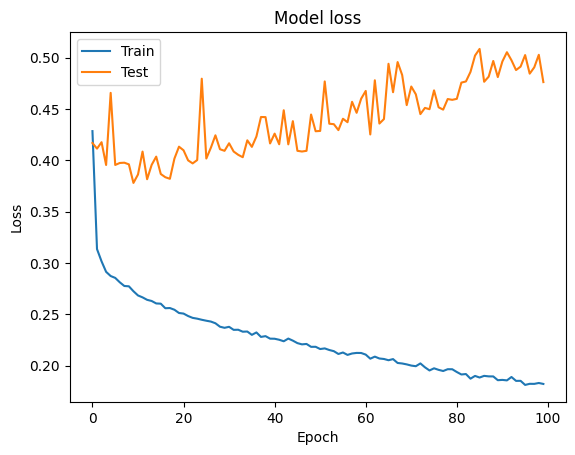

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

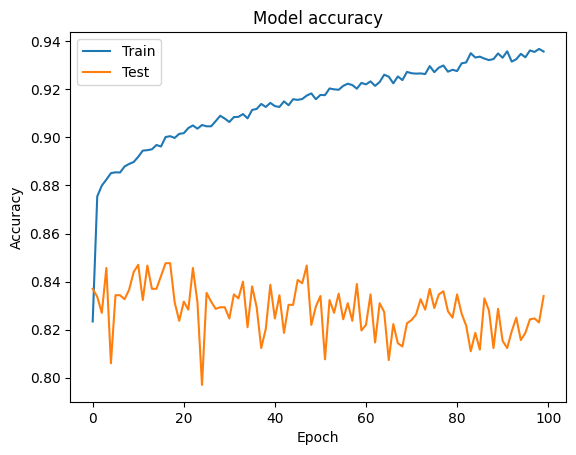

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

# new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])))
new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 0, 0, 1, 0]])))
new_prediction = (new_prediction > 0.5 )
print(new_prediction)

1/1 [==============================] - 0s 111ms/step
[[ True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# y_pred = model.predict(x_test)

train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Training Accuracy :", train_accuracy)
print("Testing Accuracy :", test_accuracy)


# cm = confusion_matrix(y_test, y_pred)
# print(cm)

94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8340
Training Accuracy : 0.9448022842407227
Testing Accuracy : 0.8339999914169312


In [ ]:
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
# y_pred1 = sc.inverse_transform(y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2161  213]
 [ 285  341]]
